In [6]:
## Imports
using VortexDistributions, JLD2, FourierGPE, Interpolations
using NearestNeighbors, LinearAlgebra, Distances;
using GLMakie, Colors
using BSON, DifferentialEquations, ScikitLearn, Static, FFTW
using LoopVectorization

## Import functions 
utils = joinpath(@__DIR__, "../functions/util.jl")
include(utils)

periodicPlotting (generic function with 1 method)

In [2]:
## Sim params
L=(16.,16.,16.);
N=(64,64,64);
sim = Sim(L,N);
@unpack_Sim sim;

μ = 25.0;
γ = 0.05;
tf = 4/γ;
Nt = 200;
t = LinRange(0.,tf,Nt);

x,y,z = X;

## Load data 
# data = joinpath(@__DIR__, "../data/64quench4heal.bson")
data = joinpath(@__DIR__, "../data/box_vorts.jld2")

# BSON.@load data sol
@load data psi_tubes1 X

## Pick a psi and plot it
# psi = xspace(sol(25.), sim);
psi = psi_tubes1
plot_iso(psi, X, true, true)

In [ ]:
scatter(rand(10), rand(10))

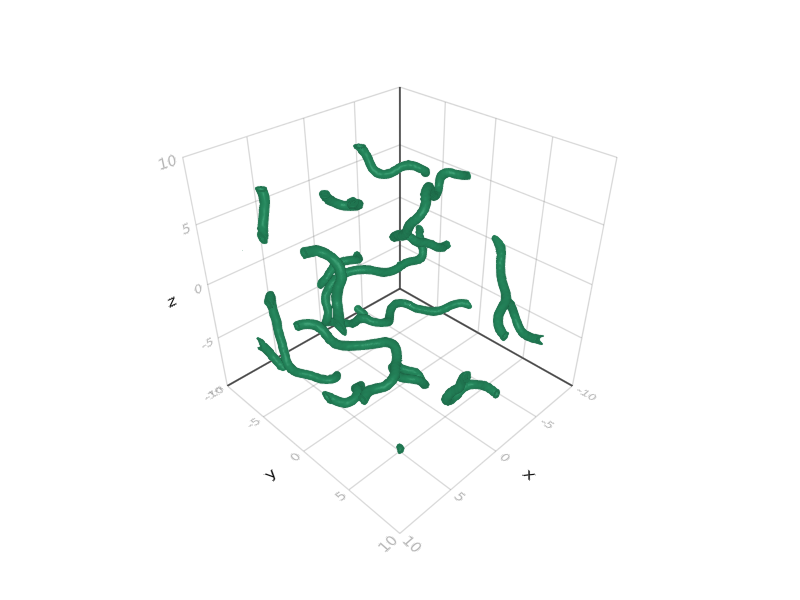

In [12]:
plot_iso(psi, X, true, true)

In [11]:
GLMakie.inline!(true)

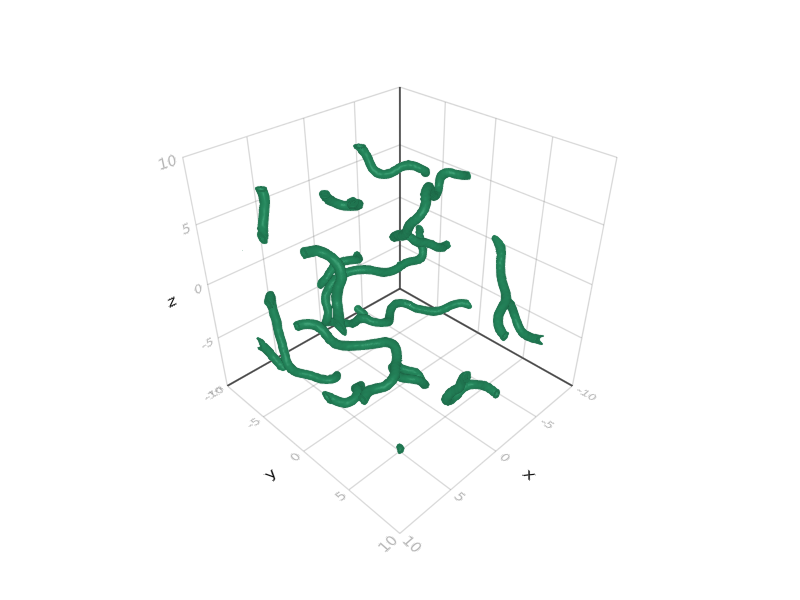

  0.219959 seconds (1.49 M allocations: 646.968 MiB, 23.58% gc time)


Scatter{Tuple{Vector{Point{3, Float32}}}}

In [16]:
# Params 
N = 4
markersize = 400


# This finds all vortex points intersecting the planes in 3 directions
@time vorts_3d = findvortices3D_itp(psi, X, N) 
plot_iso(psi, X, true, true)
scatterVortsOnIso(vorts_3d, markersize)

0.14433756729740643  0.998695 seconds (2.91 M allocations: 179.748 MiB, 4.73% gc time, 97.92% compilation time)


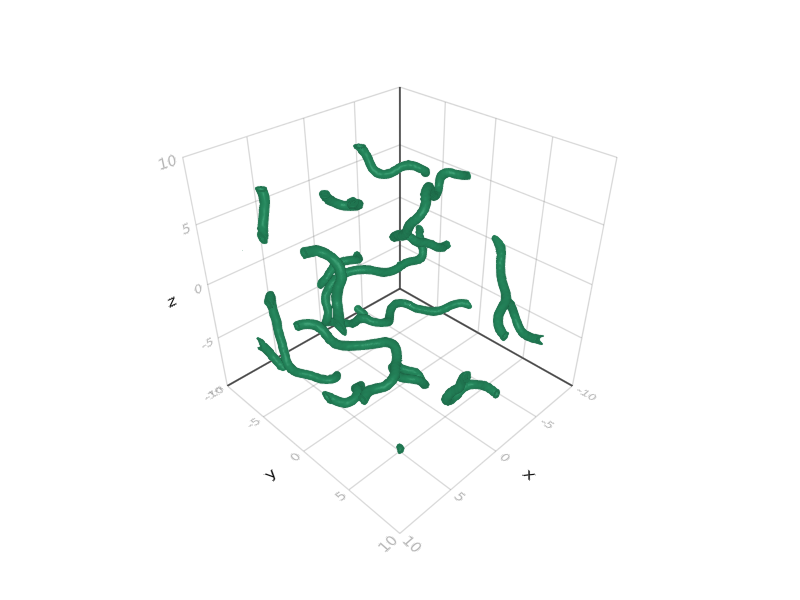

In [17]:
# This creates an array of sets of connected vortices unordered
@time vorts_class = setMethodPeriodic(vorts_3d, X, 0., N, true) 
plot_iso(psi, X, true, true)
scatterClassifiedVortices(vorts_class, vorts_3d, X, markersize)

  4.926117 seconds (13.27 M allocations: 759.369 MiB, 2.01% gc time, 97.47% compilation time)


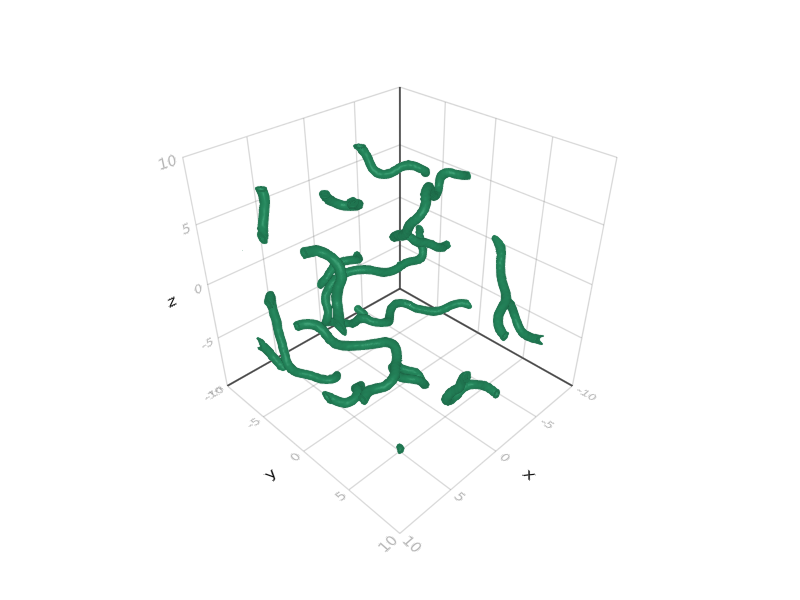

In [18]:
# This orders the vortices
@time v_sort = sort_classified_vorts4(vorts_class, vorts_3d, X); 
plot_iso(psi, X, true, true)
periodicPlotting(v_sort, X)